## Load Base Stable Diffusion Model

In [9]:
from diffusers import StableDiffusionImg2ImgPipeline
from pruna.algorithms.smasher_config import AutoSmasherConfig
from pruna.smash import smash
import torch
import requests
from PIL import Image
from io import BytesIO

from diffusers import ControlNetModel, StableDiffusionXLControlNetPipeline, AutoencoderKL
from diffusers.utils import load_image
from PIL import Image
import torch
import numpy as np
import cv2

prompt = "aerial view, a futuristic research complex in a bright foggy jungle, hard lighting"
negative_prompt = 'low quality, bad quality, sketches'

image = load_image("https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/sd_controlnet/hf-logo.png")

controlnet_conditioning_scale = 0.5  # recommended for good generalization

controlnet = ControlNetModel.from_pretrained(
    "diffusers/controlnet-canny-sdxl-1.0",
    torch_dtype=torch.float16,
)
# vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
pipe = StableDiffusionXLControlNetPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    controlnet=controlnet,
#     vae=vae,
    torch_dtype=torch.float16,

)
pipe.to('cuda')

image = np.array(image)
image = cv2.Canny(image, 100, 200)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
image = Image.fromarray(image)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

## Smash it!

In [2]:
from pruna.algorithms.smasher_config import SmasherConfig

smasher_config = SmasherConfig()
smasher_config['compiler'] = 'diffusers'
smasher_config['max_batch_size'] = 1
smasher_config['image_height'] = 512
smasher_config['image_width'] = 512
smasher_config['version'] = 'xl-1.0'
smasher_config['static_shape'] = False
smasher_config['controlnet'] = True

In [3]:
smashed_model = smash(
        model=pipe,
        data_module="img2img",
        api_key='your-api-key',
        model_config=None,
        smasher_config=smasher_config,
        device='cuda',
    )

Received a 500 error, retrying in 3 seconds...
Compile...
[I] Load tokenizer pytorch model from: .cache/torch/xl-1.0/SD_XL_IMG2IMG/tokenizer_2
[I] Load tokenizer pytorch model from: /nfs/students/rachwan/huggingface/.cache/torch/xl-1.0/SD_XL_IMG2IMG/tokenizer
Exporting model: /nfs/students/rachwan/huggingface/.cache/onnx/clip/model.onnx
Generating optimizing model: /nfs/students/rachwan/huggingface/.cache/onnx/clip.opt/model.onnx


2023-11-15 16:30:33.900291088 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 200258, index: 2, mask: {65, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:30:33.900293258 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 200257, index: 1, mask: {1, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:30:33.900284478 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 200256, index: 0, mask: {64, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:30:33.900307777 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 200260, index: 4, mask: {66, }, error code: 22 error msg: Invalid argument. Specify the nu

[W] colored module is not installed, will not use colors when logging. To enable colors, please install the colored module: python3 -m pip install colored
[W] Inference failed. You may want to try enabling partitioning to see better results. Note: Error was:
[ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Failed to load model with error: /onnxruntime_src/onnxruntime/core/graph/model.cc:146 onnxruntime::Model::Model(onnx::ModelProto&&, const PathString&, const IOnnxRuntimeOpSchemaRegistryList*, const onnxruntime::logging::Logger&, const onnxruntime::ModelOptions&) Unsupported model IR version: 9, max supported IR version: 8


2023-11-15 16:30:34.554409903 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 200383, index: 0, mask: {64, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:30:34.554422973 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 200384, index: 1, mask: {1, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:30:34.554448332 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 200385, index: 2, mask: {65, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:30:34.554484592 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 200386, index: 3, mask: {2, }, error code: 22 error msg: Invalid argument. Specify the num

[W] colored module is not installed, will not use colors when logging. To enable colors, please install the colored module: python3 -m pip install colored
[W] Inference failed. You may want to try enabling partitioning to see better results. Note: Error was:
[ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Failed to load model with error: /onnxruntime_src/onnxruntime/core/graph/model.cc:146 onnxruntime::Model::Model(onnx::ModelProto&&, const PathString&, const IOnnxRuntimeOpSchemaRegistryList*, const onnxruntime::logging::Logger&, const onnxruntime::ModelOptions&) Unsupported model IR version: 9, max supported IR version: 8


hreadMain] pthread_setaffinity_np failed for thread: 200448, index: 65, mask: {33, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:30:34.558233206 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 200465, index: 82, mask: {105, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:30:34.558246976 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 200449, index: 66, mask: {97, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:30:34.558249446 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 200466, index: 83, mask: {42, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-

[W] colored module is not installed, will not use colors when logging. To enable colors, please install the colored module: python3 -m pip install colored
[W] Inference failed. You may want to try enabling partitioning to see better results. Note: Error was:
[ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Failed to load model with error: /onnxruntime_src/onnxruntime/core/graph/model.cc:146 onnxruntime::Model::Model(onnx::ModelProto&&, const PathString&, const IOnnxRuntimeOpSchemaRegistryList*, const onnxruntime::logging::Logger&, const onnxruntime::ModelOptions&) Unsupported model IR version: 9, max supported IR version: 8


ead: 200583, index: 73, mask: {37, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:30:35.454805442 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 200577, index: 67, mask: {34, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:30:35.454821902 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 200584, index: 74, mask: {101, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:30:35.454828362 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 200578, index: 68, mask: {98, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:30:35.454842152 [E:onnxruntime:Default,

Exporting model: /nfs/students/rachwan/huggingface/.cache/onnx/clip2/model.onnx
Generating optimizing model: /nfs/students/rachwan/huggingface/.cache/onnx/clip2.opt/model.onnx


2023-11-15 16:30:56.938966649 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 200638, index: 0, mask: {64, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:30:56.939046598 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 200642, index: 4, mask: {66, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:30:56.939147667 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 200644, index: 6, mask: {67, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:30:56.939264556 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 200639, index: 1, mask: {1, }, error code: 22 error msg: Invalid argument. Specify the nu

[W] colored module is not installed, will not use colors when logging. To enable colors, please install the colored module: python3 -m pip install colored
[W] Inference failed. You may want to try enabling partitioning to see better results. Note: Error was:
[ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Failed to load model with error: /onnxruntime_src/onnxruntime/core/graph/model.cc:146 onnxruntime::Model::Model(onnx::ModelProto&&, const PathString&, const IOnnxRuntimeOpSchemaRegistryList*, const onnxruntime::logging::Logger&, const onnxruntime::ModelOptions&) Unsupported model IR version: 9, max supported IR version: 8


2023-11-15 16:31:00.046727174 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 200766, index: 1, mask: {1, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:31:00.046731804 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 200765, index: 0, mask: {64, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:31:00.046794353 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 200767, index: 2, mask: {65, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:31:00.046841933 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 200769, index: 4, mask: {66, }, error code: 22 error msg: Invalid argument. Specify the nu

[W] colored module is not installed, will not use colors when logging. To enable colors, please install the colored module: python3 -m pip install colored
[W] Inference failed. You may want to try enabling partitioning to see better results. Note: Error was:
[ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Failed to load model with error: /onnxruntime_src/onnxruntime/core/graph/model.cc:146 onnxruntime::Model::Model(onnx::ModelProto&&, const PathString&, const IOnnxRuntimeOpSchemaRegistryList*, const onnxruntime::logging::Logger&, const onnxruntime::ModelOptions&) Unsupported model IR version: 9, max supported IR version: 8


2023-11-15 16:31:03.349466530 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 200892, index: 0, mask: {64, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:31:03.349533260 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 200895, index: 3, mask: {2, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:31:03.349479010 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 200893, index: 1, mask: {1, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:31:03.349503020 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 200894, index: 2, mask: {65, }, error code: 22 error msg: Invalid argument. Specify the num

[W] colored module is not installed, will not use colors when logging. To enable colors, please install the colored module: python3 -m pip install colored
[W] Inference failed. You may want to try enabling partitioning to see better results. Note: Error was:
[ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Failed to load model with error: /onnxruntime_src/onnxruntime/core/graph/model.cc:146 onnxruntime::Model::Model(onnx::ModelProto&&, const PathString&, const IOnnxRuntimeOpSchemaRegistryList*, const onnxruntime::logging::Logger&, const onnxruntime::ModelOptions&) Unsupported model IR version: 9, max supported IR version: 8
Exporting model: /nfs/students/rachwan/huggingface/.cache/onnx/unetxl/model.onnx
Generating optimizing model: /nfs/students/rachwan/huggingface/.cache/onnx/unetxl.opt/model.onnx
UNetXL: original
UNetXL: cleanup


2023-11-15 16:35:26.401606996 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 201036, index: 0, mask: {64, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:35:26.401629056 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 201037, index: 1, mask: {1, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:35:26.401670535 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 201038, index: 2, mask: {65, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:35:26.401739344 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 201040, index: 4, mask: {66, }, error code: 22 error msg: Invalid argument. Specify the nu

[W] colored module is not installed, will not use colors when logging. To enable colors, please install the colored module: python3 -m pip install colored
[W] Inference failed. You may want to try enabling partitioning to see better results. Note: Error was:
[ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Failed to load model with error: /onnxruntime_src/onnxruntime/core/graph/model.cc:146 onnxruntime::Model::Model(onnx::ModelProto&&, const PathString&, const IOnnxRuntimeOpSchemaRegistryList*, const onnxruntime::logging::Logger&, const onnxruntime::ModelOptions&) Unsupported model IR version: 9, max supported IR version: 8


2023-11-15 16:35:41.781885441 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 201163, index: 0, mask: {64, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:35:41.781929160 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 201164, index: 1, mask: {1, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:35:41.782023419 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 201167, index: 4, mask: {66, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:35:41.782041379 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 201168, index: 5, mask: {3, }, error code: 22 error msg: Invalid argument. Specify the num

[W] colored module is not installed, will not use colors when logging. To enable colors, please install the colored module: python3 -m pip install colored
[W] Inference failed. You may want to try enabling partitioning to see better results. Note: Error was:
[ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Failed to load model with error: /onnxruntime_src/onnxruntime/core/graph/model.cc:146 onnxruntime::Model::Model(onnx::ModelProto&&, const PathString&, const IOnnxRuntimeOpSchemaRegistryList*, const onnxruntime::logging::Logger&, const onnxruntime::ModelOptions&) Unsupported model IR version: 9, max supported IR version: 8


2023-11-15 16:35:59.779033643 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 201291, index: 0, mask: {64, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:35:59.779055543 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 201292, index: 1, mask: {1, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:35:59.779135702 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 201295, index: 4, mask: {66, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:35:59.779162742 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 201296, index: 5, mask: {3, }, error code: 22 error msg: Invalid argument. Specify the num

[W] colored module is not installed, will not use colors when logging. To enable colors, please install the colored module: python3 -m pip install colored
[W] Inference failed. You may want to try enabling partitioning to see better results. Note: Error was:
[ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Failed to load model with error: /onnxruntime_src/onnxruntime/core/graph/model.cc:146 onnxruntime::Model::Model(onnx::ModelProto&&, const PathString&, const IOnnxRuntimeOpSchemaRegistryList*, const onnxruntime::logging::Logger&, const onnxruntime::ModelOptions&) Unsupported model IR version: 9, max supported IR version: 8


2023-11-15 16:36:13.641312095 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 201420, index: 2, mask: {65, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:36:13.641315575 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 201418, index: 0, mask: {64, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:36:13.641320385 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 201419, index: 1, mask: {1, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-11-15 16:36:13.641386384 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 201421, index: 3, mask: {2, }, error code: 22 error msg: Invalid argument. Specify the num

[W] colored module is not installed, will not use colors when logging. To enable colors, please install the colored module: python3 -m pip install colored
[W] Inference failed. You may want to try enabling partitioning to see better results. Note: Error was:
[ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Failed to load model with error: /onnxruntime_src/onnxruntime/core/graph/model.cc:146 onnxruntime::Model::Model(onnx::ModelProto&&, const PathString&, const IOnnxRuntimeOpSchemaRegistryList*, const onnxruntime::logging::Logger&, const onnxruntime::ModelOptions&) Unsupported model IR version: 9, max supported IR version: 8
UNetXL: fold constants
UNetXL: shape inference
UNetXL: finished
Building TensorRT engine for /nfs/students/rachwan/huggingface/.cache/onnx/clip.opt/model.onnx: /nfs/students/rachwan/huggingface/.cache/engine/clip.plan
Updating network outputs to ['text_embeddings', 'hidden_states']
Building TensorRT engine for /nfs/students/rachwan/huggingface/.cache/onnx/clip2.opt/model

[libprotobuf WARNING google/protobuf/io/coded_stream.cc:604] Reading dangerously large protocol message.  If the message turns out to be larger than 2147483647 bytes, parsing will be halted for security reasons.  To increase the limit (or to disable these warnings), see CodedInputStream::SetTotalBytesLimit() in google/protobuf/io/coded_stream.h.
[libprotobuf WARNING google/protobuf/io/coded_stream.cc:81] The total number of bytes read was 1390633693
[libprotobuf WARNING google/protobuf/io/coded_stream.cc:604] Reading dangerously large protocol message.  If the message turns out to be larger than 2147483647 bytes, parsing will be halted for security reasons.  To increase the limit (or to disable these warnings), see CodedInputStream::SetTotalBytesLimit() in google/protobuf/io/coded_stream.h.
[libprotobuf WARNING google/protobuf/io/coded_stream.cc:81] The total number of bytes read was 1390633693


Updating network outputs to ['text_embeddings', 'hidden_states']
Building TensorRT engine for /nfs/students/rachwan/huggingface/.cache/onnx/unetxl.opt/model.onnx: /nfs/students/rachwan/huggingface/.cache/engine/unetxl.plan
Loading TensorRT engine: /nfs/students/rachwan/huggingface/.cache/engine/clip.plan
Loading TensorRT engine: /nfs/students/rachwan/huggingface/.cache/engine/clip2.plan
Loading TensorRT engine: /nfs/students/rachwan/huggingface/.cache/engine/unetxl.plan
Success.
Error logging request, retrying in 3 seconds...


## Base Model Generation

In [ ]:
%%time
pipe(prompt=prompt, image=image).images[0].show()

  0%|          | 0/50 [00:00<?, ?it/s]

## Smashed Model Generation

CPU times: user 6.51 s, sys: 2.06 s, total: 8.56 s
Wall time: 8.56 s


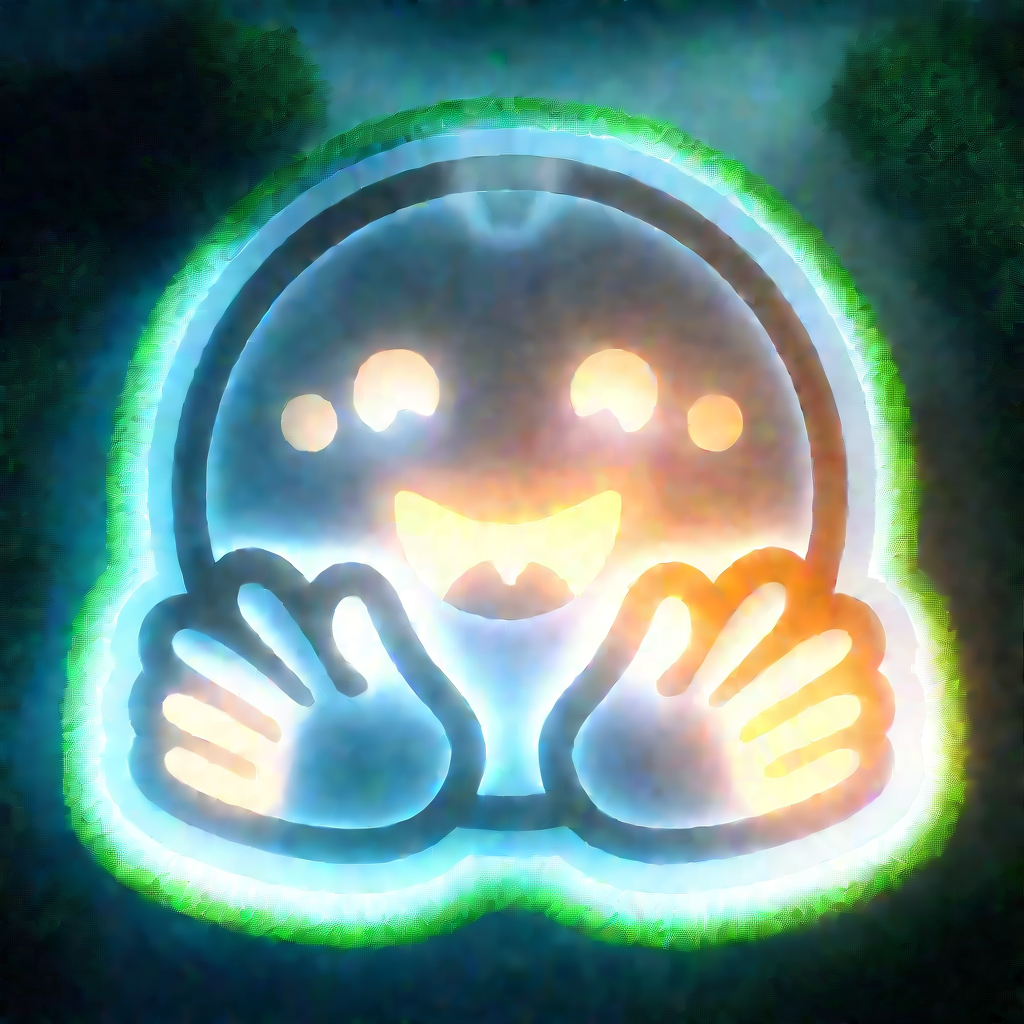

In [8]:
%%time
smashed_model(prompt, init_image=image, image_height=1024, image_width=1024)[0]